In [8]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

dti_metric_list_str=['FA']
dti_metric_list=['FA']
CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']
dti_metric=0  #0 : FA / 1 : RD ..

ccxID=4

warnings.filterwarnings('ignore')

cwd = os.getcwd()

pathfile=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA/Projets/CRPN_DTI_AGING_DPAKNC/'


pathdata=pathfile+'data/'
pathdata_tractography=pathfile+'data/Corrected_Tractometry2025'
pathcsv=pathfile+'CSV/'
os.chdir(pathfile)

Aging_INDICES = pd.read_excel('Subjects_ID_112025_42s.xlsx', sheet_name='Sheet1')

addtocc='_112025_42s' #addtocc='_46removed'
titreSubjectcsv='Subject_preproc'+addtocc
SubjectTable=Aging_INDICES[['sub','sex', 'age', 'group', 'JND_P']]
SubjectTable

listsub=SubjectTable['sub'].values
SubjectTable

,sub,sex,age,group,JND_P
0,sub-01,F,25,Y,9.5600
1,sub-02,M,27,Y,6.6900
2,sub-03,F,28,Y,12.9200
3,sub-05,F,21,Y,1.9500
4,sub-06,F,25,Y,2.5400
5,sub-08,F,67,O,4.4800
6,sub-09,M,73,O,9.6300
7,sub-10,F,64,O,7.2700
8,sub-11,F,21,Y,1.6200
9,sub-12,M,21,Y,3.6800


In [10]:
listsuball=['1','2','3','5','6','8','9','10','11','12','13','14','15','16','17','19'
         ,'20','21','22','23','24','25','26','27','29','30','31','32','33','34','35','36'
         ,'37','38','39','41','42','43','44','45','46','47','48','49','50']


listsubwithoutimputed=['1','2','3','5','6','8','9','10','11','12','13','14','15','16','17','19'
         ,'20','21','22','23','24','25','26','27','29','30','31','32','33','34','35','36'
         ,'37','38','39','41','46','47','48','49','50','51']



listsub=listsubwithoutimputed

print('len list sub  : ' ,len(listsub))

print('list subject table : ' ,len(SubjectTable))


SubjectTable

len list sub  :  42
list subject table :  42


,sub,age,group,JND_P,group_O,group_Y
0,sub-01,25,Y,9.5600,0.0,1.0
1,sub-02,27,Y,6.6900,0.0,1.0
2,sub-03,28,Y,12.9200,0.0,1.0
3,sub-05,21,Y,1.9500,0.0,1.0
4,sub-06,25,Y,2.5400,0.0,1.0
5,sub-08,67,O,4.4800,1.0,0.0
6,sub-09,73,O,9.6300,1.0,0.0
7,sub-10,64,O,7.2700,1.0,0.0
8,sub-11,21,Y,1.6200,0.0,1.0
9,sub-12,21,Y,3.6800,0.0,1.0


In [11]:
#One hot encoder for groups
from sklearn.preprocessing import OneHotEncoder

category_column = SubjectTable[['group']]

encoder = OneHotEncoder(sparse_output=False)
# Ajuster et transformer la colonne catégorielle
encoded_categories = encoder.fit_transform(category_column)
# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['group']))
# Concaténer le DataFrame encodé avec le DataFrame original (sans la colonne catégorielle)
SubjectTable = pd.concat([SubjectTable.drop(columns=['sex']), encoded_df], axis=1)
# Afficher le DataFrame résultant
SubjectTable.head()

SubjectTable.to_csv(titreSubjectcsv+'.csv', index=False)  



KeyError: "['sex'] not found in axis"

In [12]:
# %% CREATE CSV allsub DTI FILE FOR GIVEN CC and metric 

dti_metric_list=['FA']
CCx_list=['CC_1']
CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

tracto_folder_path = './Corrected_Tractometry2025'
pathdata_tractography
print(len(listsub))

for dti_metric in dti_metric_list:
    for CCx in CCx_list:
        list_CCx_val = []
        for subj in listsub:
            file_path = os.path.join(pathdata_tractography, f'sub-{subj}_{dti_metric}_tractometry_mergedTOMs.csv')
            data_sub = pd.read_csv(file_path, sep=";")
            list_CCx_val.append(data_sub[CCx].values)
       
        dfCCx = pd.DataFrame(list_CCx_val)
        dfCCx.to_csv(pathcsv+ CCx +'_'+dti_metric+addtocc+'.csv', index=False)  
dfCCx

42


,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.217662,0.210098,0.247803,0.268852,0.290765,0.323112,0.343515,0.357370,0.369495,0.379671,...,0.360924,0.332037,0.314768,0.299466,0.298382,0.308184,0.298445,0.273005,0.262117,0.256813
1,0.253484,0.262070,0.292464,0.332066,0.363638,0.387894,0.380612,0.380712,0.392777,0.405353,...,0.406321,0.379443,0.356917,0.352207,0.348463,0.339861,0.316460,0.295315,0.280481,0.261766
2,0.260242,0.270165,0.298168,0.317146,0.341831,0.349599,0.360562,0.364213,0.387899,0.417723,...,0.401845,0.398161,0.385322,0.370853,0.351907,0.341978,0.327453,0.311015,0.270894,0.284198
3,0.284478,0.273726,0.305177,0.316505,0.333896,0.341914,0.340203,0.352046,0.366992,0.396127,...,0.406781,0.398832,0.383533,0.360845,0.344475,0.325261,0.298865,0.274800,0.256411,0.242831
4,0.299203,0.279968,0.325303,0.330661,0.334002,0.345579,0.356900,0.364836,0.374161,0.378739,...,0.403711,0.402517,0.389317,0.374304,0.378468,0.367895,0.331832,0.293978,0.256532,0.244655
5,0.249114,0.250951,0.267584,0.286253,0.296806,0.301370,0.310927,0.335006,0.350420,0.357424,...,0.381200,0.377648,0.360250,0.331464,0.297376,0.278327,0.270713,0.255711,0.235702,0.237421
6,0.230379,0.236439,0.277582,0.309031,0.306698,0.306992,0.331809,0.355294,0.382883,0.392361,...,0.395012,0.378646,0.357448,0.361038,0.354933,0.348497,0.333969,0.316496,0.291771,0.259902
7,0.247300,0.233605,0.275655,0.297064,0.322150,0.360207,0.381733,0.383638,0.362007,0.342675,...,0.369204,0.354115,0.336158,0.324867,0.332781,0.344043,0.325135,0.304825,0.279391,0.261053
8,0.258332,0.274093,0.288809,0.298221,0.295852,0.307298,0.324540,0.352122,0.365502,0.379227,...,0.380472,0.365727,0.343857,0.333253,0.320400,0.311715,0.278089,0.257139,0.227893,0.230166
9,0.322821,0.324031,0.317832,0.320754,0.319319,0.327800,0.343721,0.343162,0.348829,0.367769,...,0.400494,0.401603,0.379597,0.359640,0.347441,0.335217,0.325998,0.296480,0.256363,0.252924


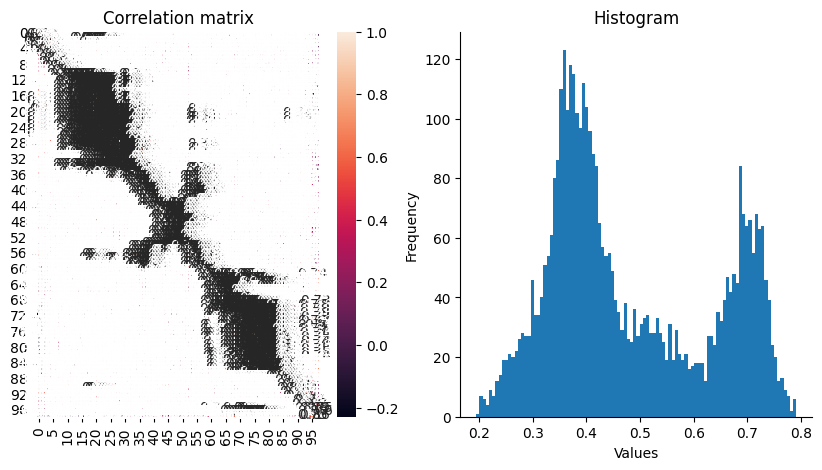

: 

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(dfCCx.corr(),annot=True,ax=ax[0])
ax[0].set_title('Correlation matrix')

ax[1].hist(dfCCx.values.flatten(),bins=100)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)




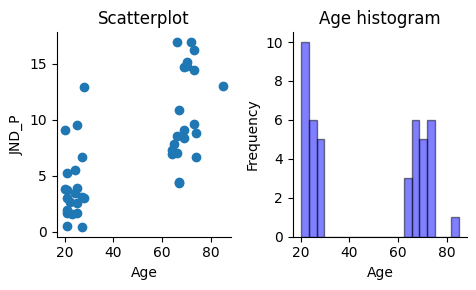

: 

: 

: 

: 

: 

In [ ]:

fig,ax=plt.subplots(1,2,figsize=(5,3))

ax[0].scatter(SubjectTable['age'],SubjectTable['JND_P'])
ax[0].set_title('Scatterplot')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('JND_P')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].hist(SubjectTable['age'],bins=20,color='blue',alpha=0.5,label='Age',edgecolor='black')
ax[1].set_title('Age histogram')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()

